In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import LabelEncoder

# Data Pre-processing

In [2]:
data_train = pd.read_csv('/Data/Visual Studio Code/Data Science/Dataset/UNSW-NB15/UNSW_NB15_training-set.csv')
data_test = pd.read_csv('/Data/Visual Studio Code/Data Science/Dataset/UNSW-NB15/UNSW_NB15_testing-set.csv')

In [3]:
data_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [5]:
print("Size: " + str(data_train.size))
print("Shape: " + str(data_train.shape))
print("-----------------------")
print(data_train.value_counts('attack_cat'))
print("-----------------------")
print(data_train.value_counts('label'))

Size: 3704940
Shape: (82332, 45)
-----------------------
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64
-----------------------
label
1    45332
0    37000
Name: count, dtype: int64


In [6]:
# Handle missing value and duplicate if any
data_train.dropna(inplace=True)
data_train.drop_duplicates(inplace=True)

data_test.dropna(inplace=True)
data_test.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Label Distribution')

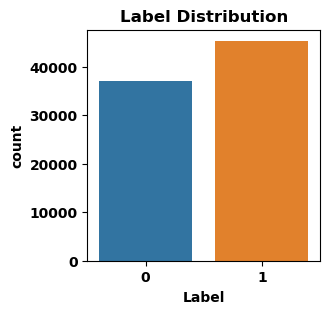

In [7]:
#Attack and Normal distribution
plt.figure(figsize=(3, 3))
sns.countplot(data=data_train, x="label")
plt.xlabel("Label")
plt.title("Label Distribution")

Text(0.5, 1.0, 'Attack Category Distribution')

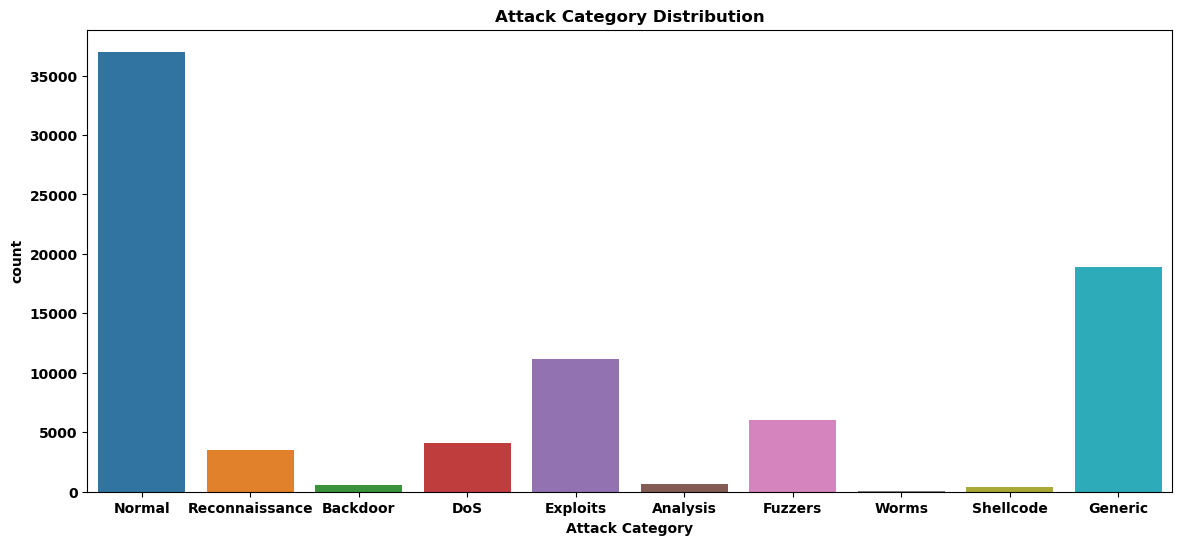

In [8]:
#Attack Category
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

In [9]:
#All_feature
all_feature = data_train.columns
all_feature

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [10]:
#Split Attack and Normal from dataframe
data_train_attack = data_train[data_train['label'] == 1]
data_test_attack = data_test[data_test['label'] == 1]

#Optional
#data_train_normal = data_train[data_train['label'] == 0]
#data_test_normal = data_test[data_test['label'] == 0]

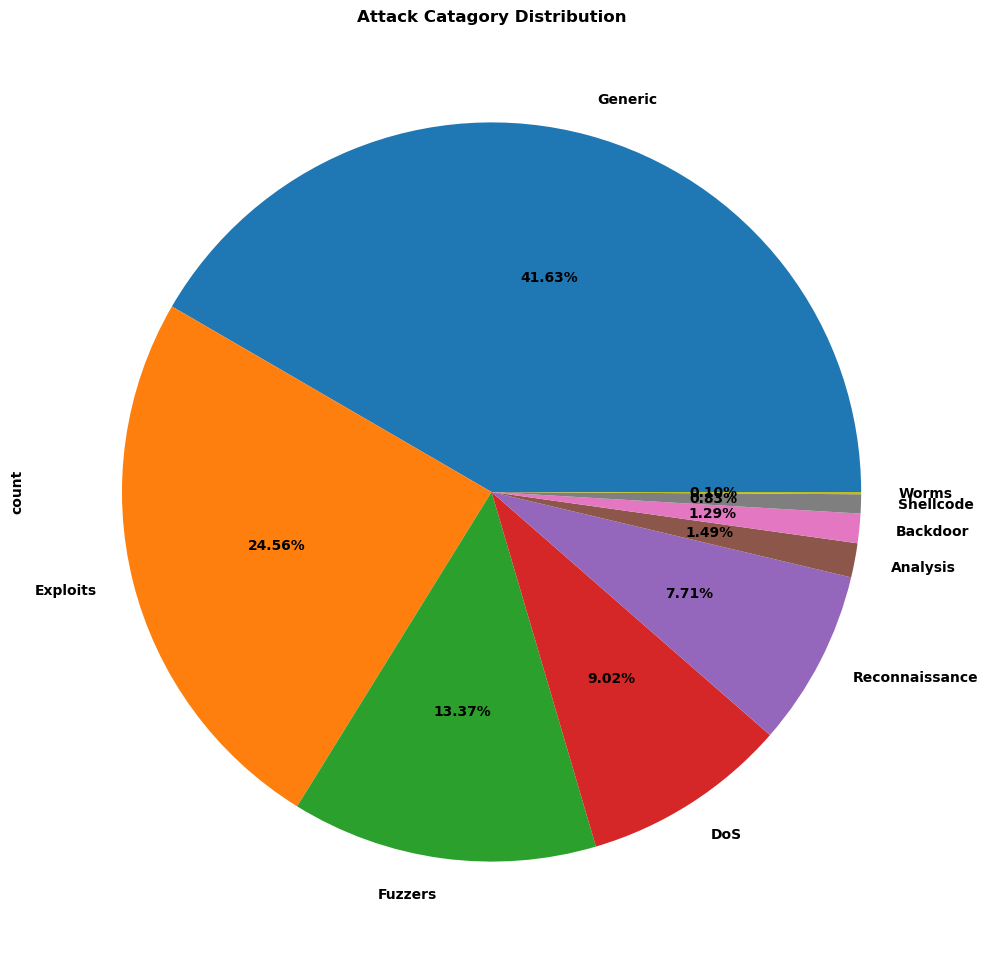

In [11]:
#Attack Category Distribution
plt.figure(figsize=(12, 12))
data_train_attack['attack_cat'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Attack Catagory Distribution")
plt.show()

Text(0.5, 1.0, 'Attack Category Distribution')

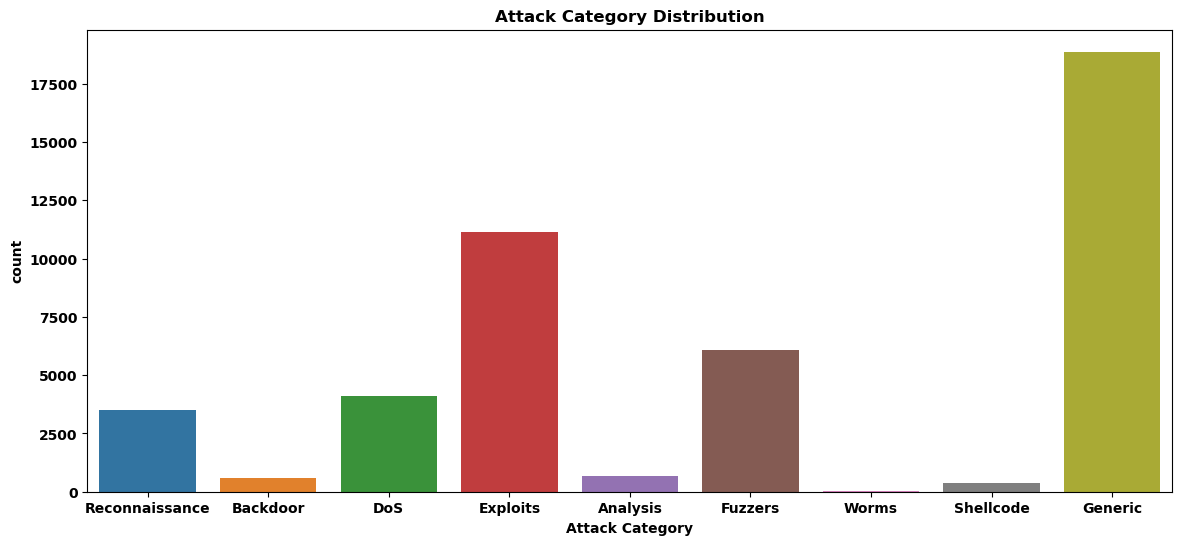

In [12]:
#Attack Category
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train_attack, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

## Encode Train Data

In [13]:
#Encode attack_cat
le = LabelEncoder()
data_train_attack['attack_cat'] = le.fit_transform(data_train_attack['attack_cat'])

#Encode state
data_train_attack['state'] = le.fit_transform(data_train_attack['state'])

#Encode service
data_train_attack['service'] = le.fit_transform(data_train_attack['service'])

#Encode proto
data_train_attack['proto'] = le.fit_transform(data_train_attack['proto'])

data_train_attack.dtypes

C:\Users\Acer\AppData\Local\Temp\ipykernel_21964\2731351650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_attack['attack_cat'] = le.fit_transform(data_train_attack['attack_cat'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_21964\2731351650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_attack['state'] = le.fit_transform(data_train_attack['state'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_21964\2731351650.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy o

id                     int64
dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

## Encode Test Data

In [14]:
#Encode attack_cat
data_test_attack['attack_cat'] = le.fit_transform(data_test_attack['attack_cat'])

#Encode state
data_test_attack['state'] = le.fit_transform(data_test_attack['state'])

#Encode service
data_test_attack['service'] = le.fit_transform(data_test_attack['service'])

#Encode proto
data_test_attack['proto'] = le.fit_transform(data_test_attack['proto'])

data_test_attack.dtypes

C:\Users\Acer\AppData\Local\Temp\ipykernel_21964\230897011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack['attack_cat'] = le.fit_transform(data_test_attack['attack_cat'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_21964\230897011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack['state'] = le.fit_transform(data_test_attack['state'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_21964\230897011.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

id                     int64
dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

Text(0.5, 1.0, 'Attack Category Distribution')

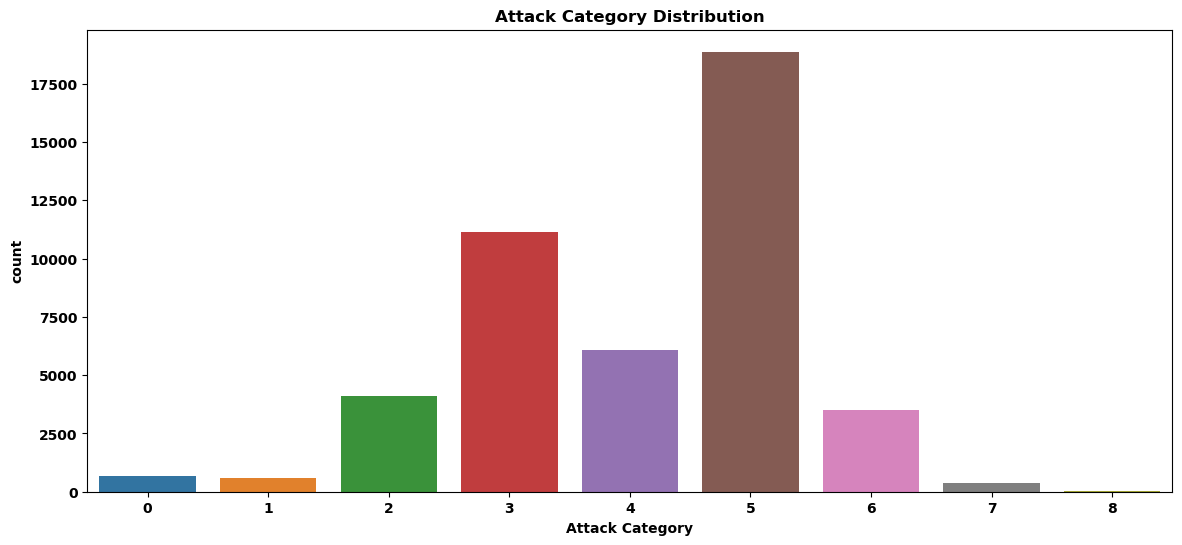

In [15]:
#After Attack Category Encoding
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train_attack, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

## Normalization

In [16]:
# Min-Max Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_norm = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 
                'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 
                'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 
                'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 
                'ct_srv_dst', 'is_sm_ips_ports']

data_train_attack[cols_to_norm] = scaler.fit_transform(data_train_attack[cols_to_norm])
data_test_attack[cols_to_norm] = scaler.fit_transform(data_test_attack[cols_to_norm])

C:\Users\Acer\AppData\Local\Temp\ipykernel_21964\1185179857.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_attack[cols_to_norm] = scaler.fit_transform(data_train_attack[cols_to_norm])
C:\Users\Acer\AppData\Local\Temp\ipykernel_21964\1185179857.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack[cols_to_norm] = scaler.fit_transform(data_test_attack[cols_to_norm])


## Feature Selection

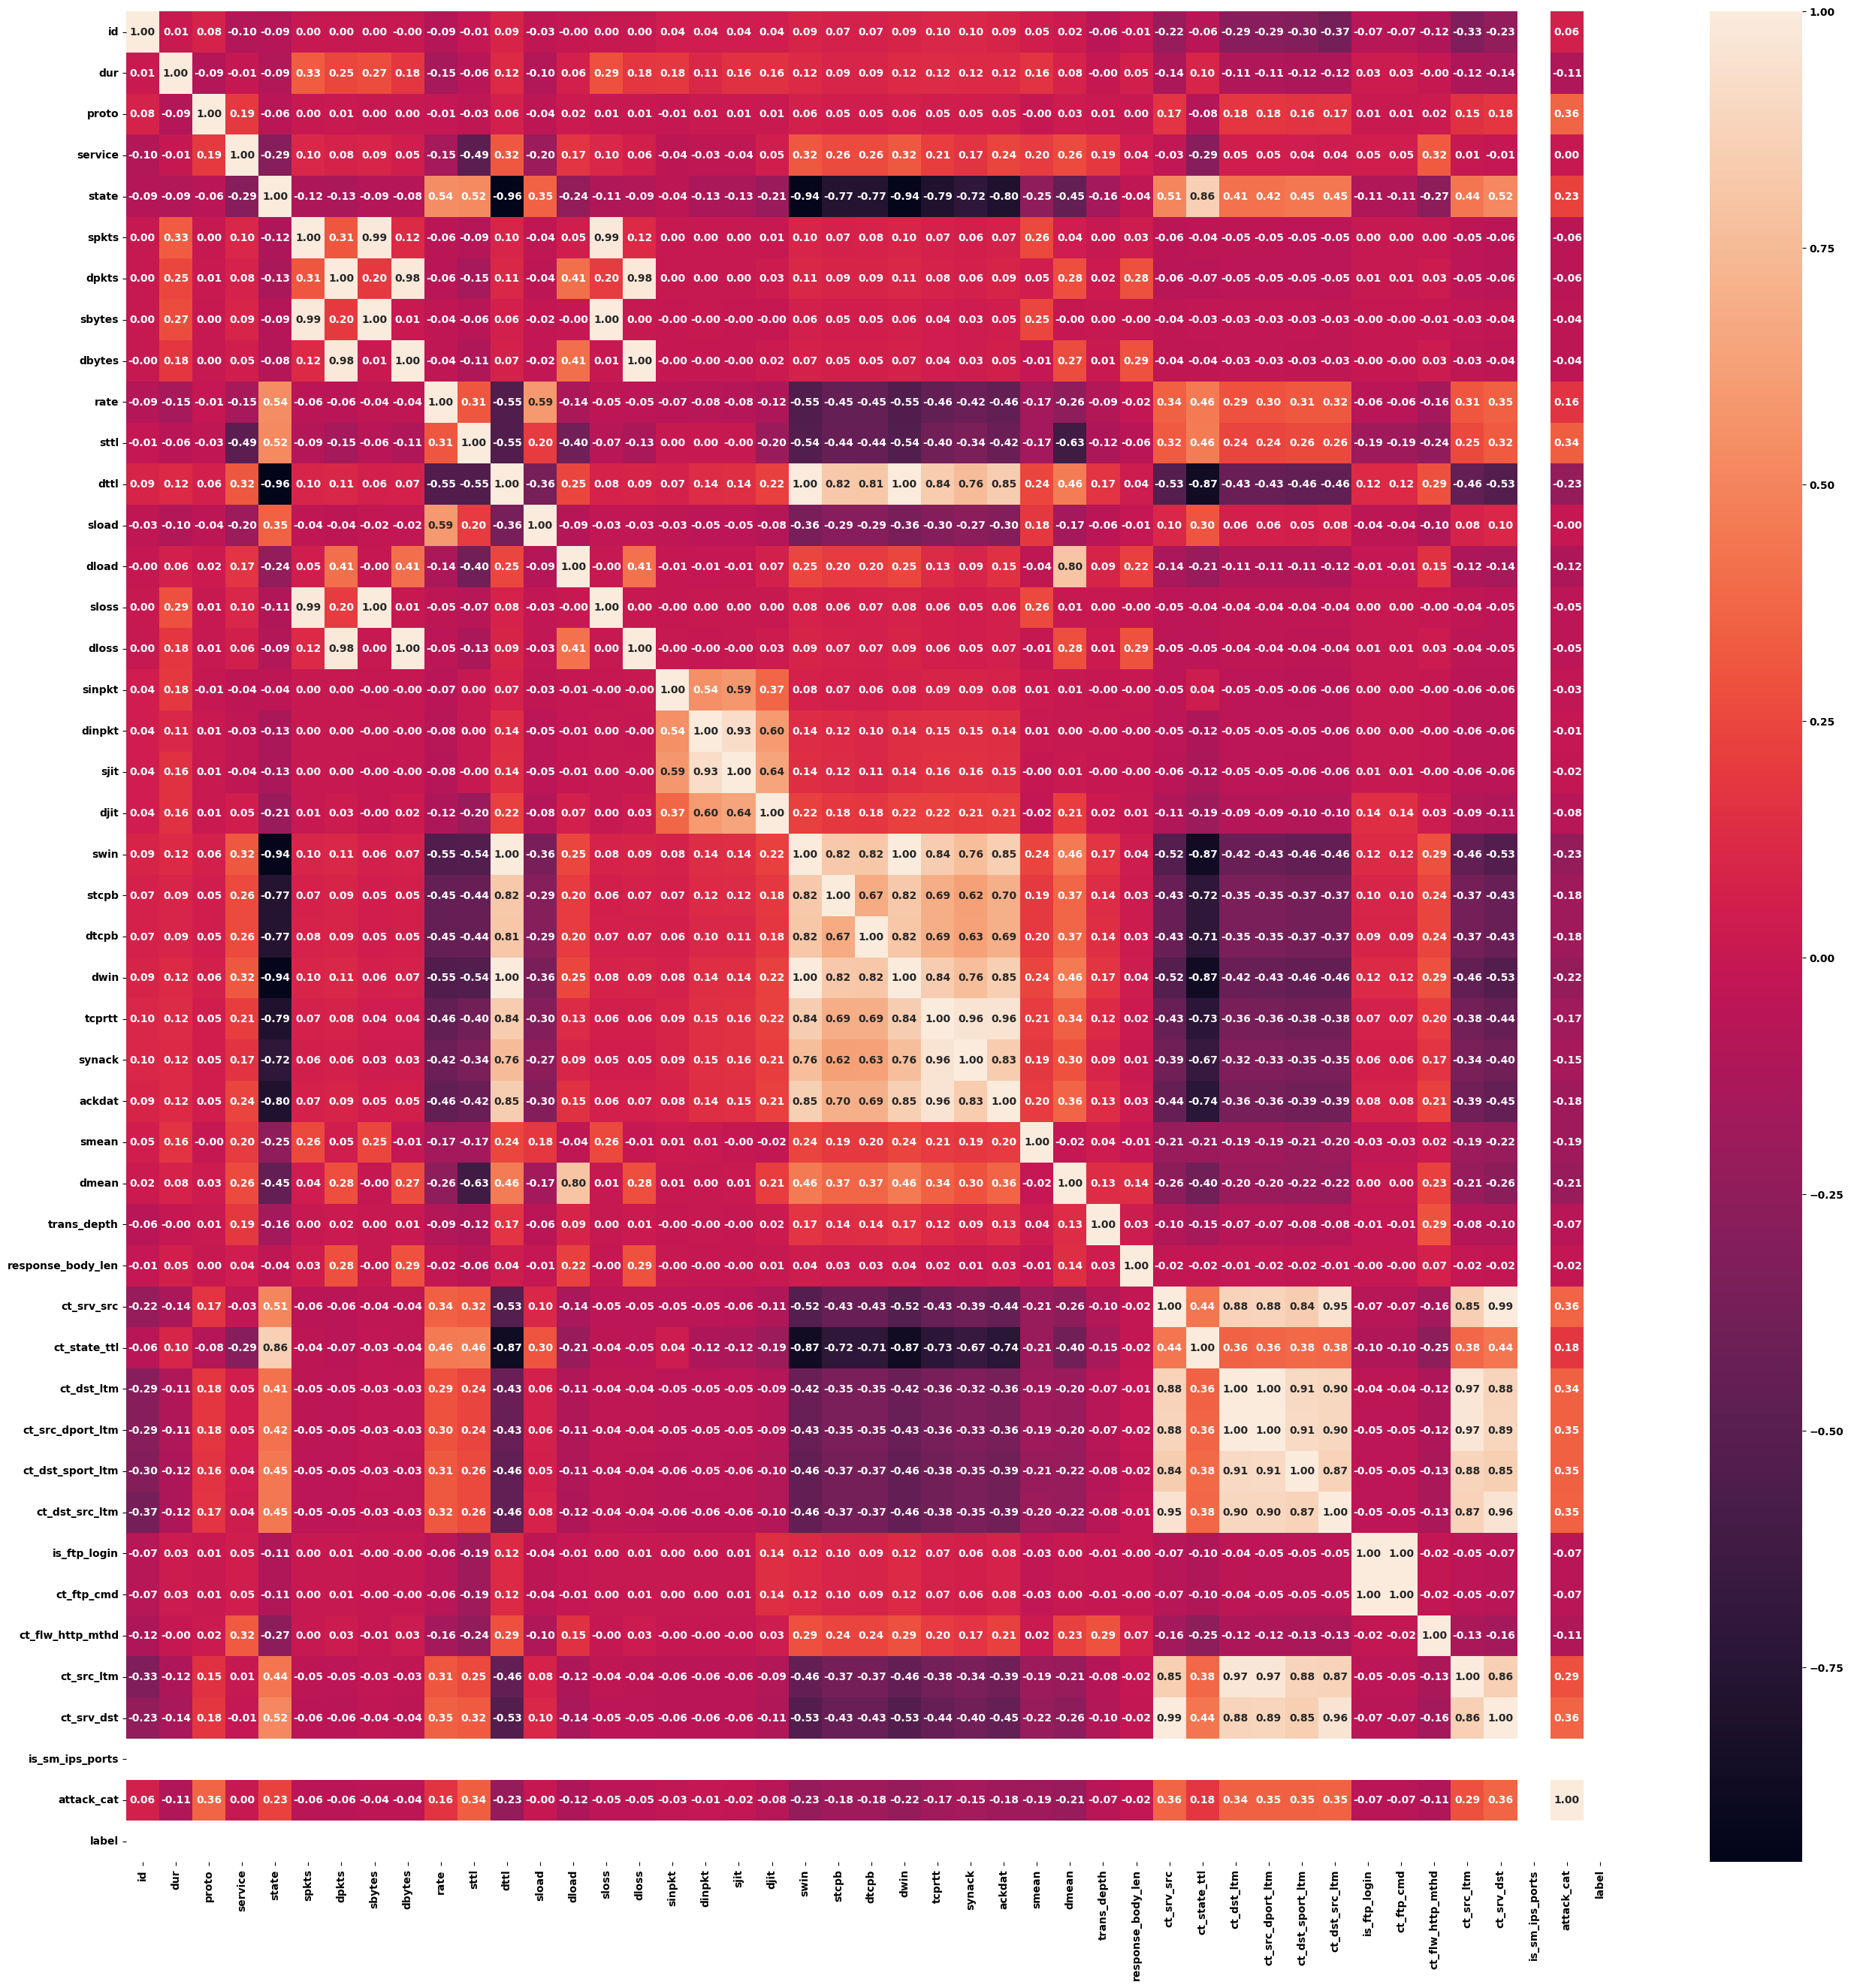

In [17]:
#Correlation between feature
#%matplotlib inline
plt.figure(figsize=[32,32])
sns.heatmap(data_train_attack.corr(), annot=True, fmt=".2f")
plt.show()

In [18]:
#Feature Selection
feature = data_train_attack.drop(['id', 'dinpkt', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'is_sm_ips_ports', 'label'], axis=1)
feature.dtypes

dur                  float64
proto                  int32
service                int32
state                  int32
spkts                float64
dpkts                float64
sbytes               float64
dbytes               float64
rate                 float64
sttl                 float64
dttl                 float64
sload                float64
dload                float64
sloss                float64
dloss                float64
sinpkt               float64
sjit                 float64
djit                 float64
swin                 float64
stcpb                float64
dtcpb                float64
dwin                 float64
tcprtt               float64
synack               float64
ackdat               float64
smean                float64
dmean                float64
trans_depth          float64
response_body_len    float64
ct_srv_src           float64
ct_state_ttl         float64
ct_dst_ltm           float64
ct_dst_sport_ltm     float64
ct_dst_src_ltm       float64
is_ftp_login  

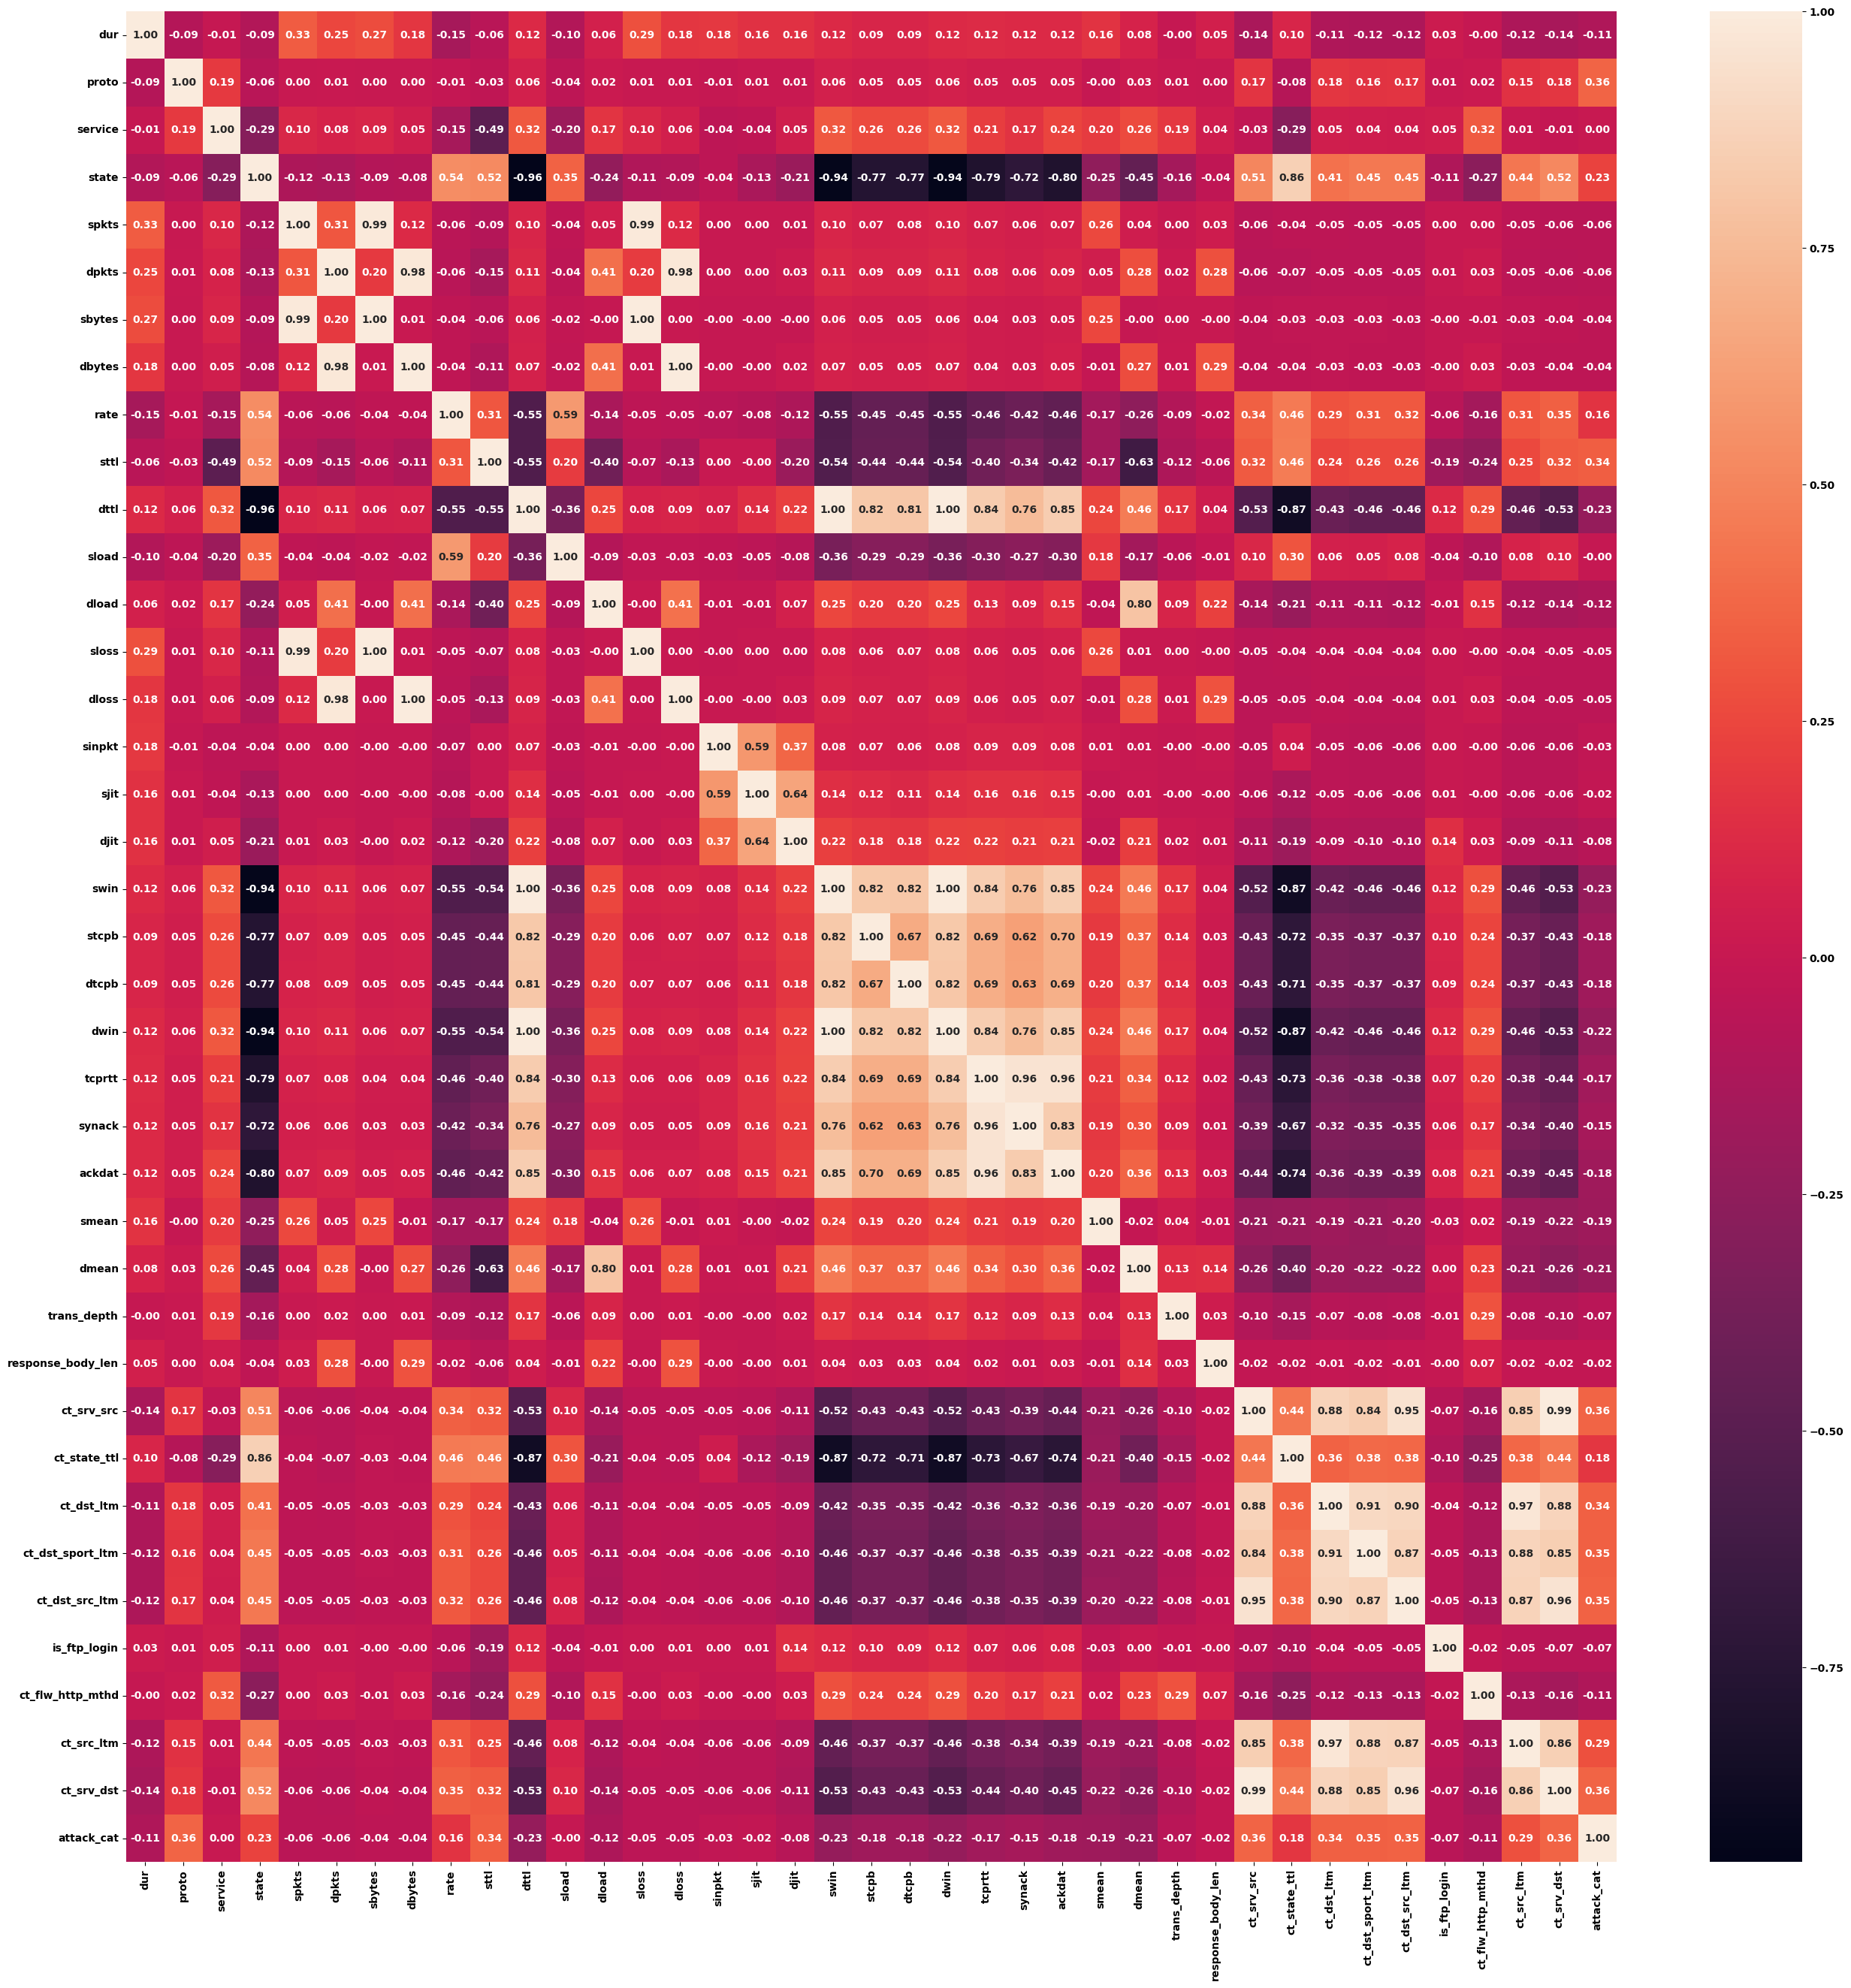

In [19]:
#Correlation between feature
#%matplotlib inline
plt.figure(figsize=[32,32])
sns.heatmap(feature.corr(), annot=True, fmt=".2f")
plt.show()

# Balancing Data

In [20]:
#Splitting the dataset into dependent and independent feature
X_train = feature.drop(columns=['attack_cat'])
y_train = feature["attack_cat"]

X_test = data_test_attack.drop(columns=['attack_cat', 'id', 'dinpkt', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'is_sm_ips_ports', 'label'])
y_test = data_test_attack["attack_cat"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((45332, 38), (45332,), (119341, 38), (119341,))

## Tomek Links

In [21]:
tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(X_train, y_train)

X_tomek.shape, y_tomek.shape

((43026, 38), (43026,))

<Axes: xlabel='attack_cat', ylabel='count'>

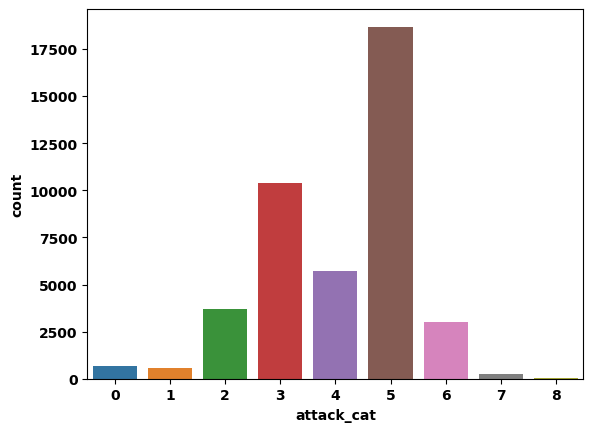

In [22]:
#Create new dataframe from X_tomek and y_tomek to count every attack
data_tomek = pd.concat([X_tomek, y_tomek], axis=1)

sns.countplot(data=data_tomek, x="attack_cat")

In [23]:
#data_stl.drop_duplicates(inplace=True)
print(data_tomek.value_counts('attack_cat'))
print("--------------------")
print("Shape: " + str(data_tomek.shape))
print("--------------------")
print("Duplicates: " + str(data_tomek.duplicated().sum()))

attack_cat
5    18682
3    10362
4     5708
2     3723
6     3025
0      667
1      563
7      252
8       44
Name: count, dtype: int64
--------------------
Shape: (43026, 39)
--------------------
Duplicates: 23607


# Model Evaluation

In [24]:
#Holder to store model performance
from sklearn import metrics
ML_Model = []
accuracy = []
precision = []
recall = []
f1_score = []


#function to storing the results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 5))
    precision.append(round(b, 5))
    recall.append(round(c, 5))
    f1_score.append(round(d, 5))

In [25]:
#function to computing performance and computing performance using classification report, then stroing the results
def model_report(modelName, y_train, y_test, p_train, p_test):
    print("Model:{}\n".format(modelName))

    #computing accuracy score
    acc_train = metrics.accuracy_score(y_train, p_train)
    acc_test = metrics.accuracy_score(y_test, p_test)
    print("Accuracy on training Data: {:.5f}".format(acc_train))
    print("Accuracy on test Data: {:.5f}\n".format(acc_test))

    #computing precision score
    precision_score_train = metrics.precision_score(y_train, p_train, average='macro')
    precision_score_test = metrics.precision_score(y_test, p_test, average='macro')
    print("Precision on training Data: {:.5f}".format(precision_score_train))
    print("Precision on test Data: {:.5f}\n".format(precision_score_test))

    #computing recall score
    recall_score_train = metrics.recall_score(y_train, p_train, average='macro')
    recall_score_test = metrics.recall_score(y_test, p_test, average='macro')
    print("Recall score on training Data: {:.5f}".format(recall_score_train))
    print("Recall score on test Data: {:.5f}\n".format(recall_score_test))

    #computing f1 score
    f1_score_train = 2 * (precision_score_train * recall_score_train) / (precision_score_train + recall_score_train)
    f1_score_test = 2 * (precision_score_test * recall_score_test) / (precision_score_test + recall_score_test)
    print("F1 score on training Data: {:.5f}".format(f1_score_train))
    print("F1 score on test Data: {:.5f}\n".format(f1_score_test))

    #computing classification report of model
    print("Classification Report")
    print(metrics.classification_report(y_test, p_test))

    #storing results
    storeResults(modelName, acc_test, precision_score_test, recall_score_test, f1_score_test)

## Training, Testing, Evaluation

### Decision Tree

In [26]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier

#instantiate the model
destree = DecisionTreeClassifier(max_depth=1)

#fit the model
destree.fit(X_tomek, y_tomek)

DecisionTreeClassifier(max_depth=1)

In [27]:
#predicting
p_train_destree = destree.predict(X_tomek)
p_test_destree = destree.predict(X_test)

In [28]:
#call report function
model_report(str(destree), y_tomek, y_test, p_train_destree, p_test_destree)

Model:DecisionTreeClassifier(max_depth=1)

Accuracy on training Data: 0.66137
Accuracy on test Data: 0.60309

Precision on training Data: 0.15464
Precision on test Data: 0.15040

Recall score on training Data: 0.21835
Recall score on test Data: 0.21798

F1 score on training Data: 0.18106
F1 score on test Data: 0.17799

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.00      0.00      0.00      1746
           2       0.00      0.00      0.00     12264
           3       0.43      0.98      0.59     33393
           4       0.00      0.00      0.00     18184
           5       0.93      0.98      0.95     40000
           6       0.00      0.00      0.00     10491
           7       0.00      0.00      0.00      1133
           8       0.00      0.00      0.00       130

    accuracy                           0.60    119341
   macro avg       0.15      0.22      0.17    119341
weighte

c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\miniconda3\envs\myenv\lib\site-pac

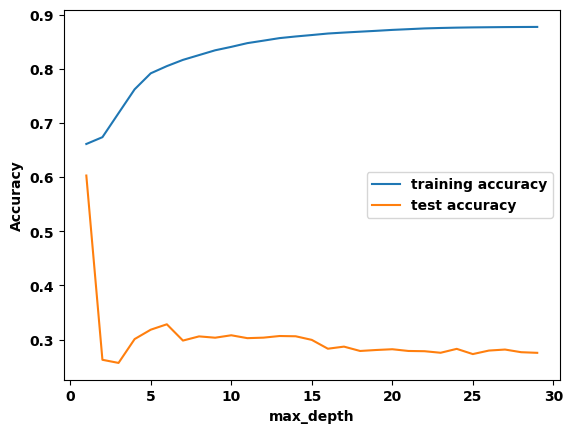

In [29]:
#plotting the train and test model accuracy
training_accuracy = []
test_accuracy = []

#try max_depth from 1 to 30
depth = range(1, 30)
for n in depth:
    destree_test = DecisionTreeClassifier(max_depth=n)

    destree_test.fit(X_tomek, y_tomek)
    #record training set accuracy
    training_accuracy.append(destree_test.score(X_tomek, y_tomek))
    #recor generalization accuracy
    test_accuracy.append(destree_test.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

### Random Forest

In [30]:
#import random forest
from sklearn.ensemble import RandomForestClassifier

#instantiate the model
ranfor = RandomForestClassifier(n_estimators=20)

#fit the model
ranfor.fit(X_tomek, y_tomek)

RandomForestClassifier(n_estimators=20)

In [31]:
#predicting
p_train_ranfor = ranfor.predict(X_tomek)
p_test_ranfor = ranfor.predict(X_test)

In [32]:
#call report function
model_report(str(ranfor), y_tomek, y_test, p_train_ranfor, p_test_ranfor)

Model:RandomForestClassifier(n_estimators=20)

Accuracy on training Data: 0.87659
Accuracy on test Data: 0.71204

Precision on training Data: 0.90707
Precision on test Data: 0.64366

Recall score on training Data: 0.71315
Recall score on test Data: 0.40345

F1 score on training Data: 0.79851
F1 score on test Data: 0.49601

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2000
           1       0.82      0.04      0.07      1746
           2       0.33      0.30      0.31     12264
           3       0.65      0.73      0.69     33393
           4       0.76      0.81      0.78     18184
           5       0.98      0.97      0.97     40000
           6       0.39      0.26      0.31     10491
           7       0.11      0.40      0.17      1133
           8       0.76      0.12      0.21       130

    accuracy                           0.71    119341
   macro avg       0.64      0.40      0.39    119341
wei

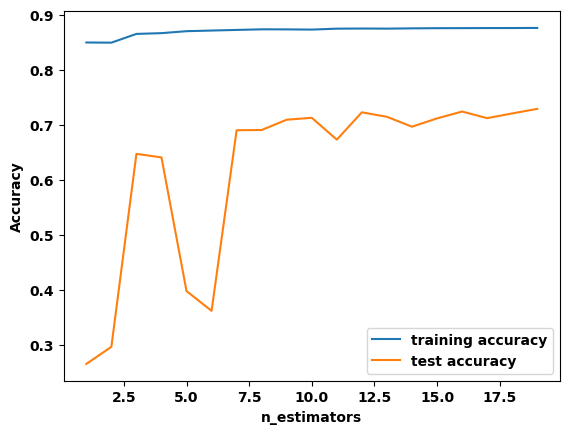

In [33]:
#plotting the train and test model accuracy
training_accuracy = []
test_accuracy = []

#try n_estimators from 1 to 20
n_est = range(1, 20)
for n in n_est:
    ranfor_test = RandomForestClassifier(n_estimators=n)

    ranfor_test.fit(X_tomek, y_tomek)
    #record training set accuracy
    training_accuracy.append(ranfor_test.score(X_tomek, y_tomek))
    #recor generalization accuracy
    test_accuracy.append(ranfor_test.score(X_test, y_test))

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(n_est, training_accuracy, label="training accuracy")
plt.plot(n_est, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

### Gradient Boosting

In [34]:
#import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

#instantiate the model
gbc = GradientBoostingClassifier()

#fit the model
gbc.fit(X_tomek, y_tomek)

GradientBoostingClassifier()

In [35]:
#predicting
p_train_gbc = gbc.predict(X_tomek)
p_test_gbc = gbc.predict(X_test)

In [36]:
#call report function
model_report(str(gbc), y_tomek, y_test, p_train_gbc, p_test_gbc)

Model:GradientBoostingClassifier()

Accuracy on training Data: 0.83773
Accuracy on test Data: 0.36132

Precision on training Data: 0.84249
Precision on test Data: 0.32516

Recall score on training Data: 0.56485
Recall score on test Data: 0.26794

F1 score on training Data: 0.67628
F1 score on test Data: 0.29379

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.61      0.06      0.11      1746
           2       0.28      0.10      0.15     12264
           3       0.59      0.74      0.66     33393
           4       0.86      0.61      0.71     18184
           5       0.19      0.01      0.01     40000
           6       0.30      0.49      0.38     10491
           7       0.10      0.32      0.15      1133
           8       0.00      0.08      0.00       130

    accuracy                           0.36    119341
   macro avg       0.33      0.27      0.24    119341
weighted avg  

c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\miniconda3\envs\myenv

### XGBoost

In [37]:
#import xgboost classifier
from xgboost import XGBClassifier

#instantiate the model
xgb = XGBClassifier()

#fit the model
xgb.fit(X_tomek, y_tomek)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [38]:
#predicting
p_train_xgb = xgb.predict(X_tomek)
p_test_xgb = xgb.predict(X_test)

In [39]:
#call report function
model_report(str(xgb), y_tomek, y_test, p_train_xgb, p_test_xgb)

Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy on training Data: 0.87277
Accuracy on test Data: 0.70254

Precision on training Data: 0.89643
Precision on test Data: 0.48949

Recall score on training Data: 0.71312
Recall score on test Data: 0.41179

F1 score on tra

c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\miniconda3\envs\myenv

# Result

## Comparison of Models

In [40]:
#creating dataframe
result = pd.DataFrame({'ML Model' : ML_Model,
                       'Accuracy' : accuracy,
                       'Precision' : precision,
                       'Recall' : recall,
                       'F1 Score' : f1_score
                       })
result

,ML Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTreeClassifier(max_depth=1),0.60309,0.15040,0.21798,0.17799
1,RandomForestClassifier(n_estimators=20),0.71204,0.64366,0.40345,0.49601
2,GradientBoostingClassifier(),0.36132,0.32516,0.26794,0.29379
3,"XGBClassifier(base_score=None, booster=None, c...",0.70254,0.48949,0.41179,0.44729


In [41]:
#Sorting the dataframe on accuracy
sorted_result = result.sort_values(by=['F1 Score'], ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier(n_estimators=20),0.71204,0.64366,0.40345,0.49601
1,"XGBClassifier(base_score=None, booster=None, c...",0.70254,0.48949,0.41179,0.44729
2,GradientBoostingClassifier(),0.36132,0.32516,0.26794,0.29379
3,DecisionTreeClassifier(max_depth=1),0.60309,0.15040,0.21798,0.17799


## Save to csv file

In [42]:
#save result to csv file
sorted_result.to_csv('encode_tomek_unswnb15_result.csv')

## Confusion Matrix

In [43]:
# function to calculate recall from confusion matrix
def calculate_recall(confusion_matrix):
    num_class = len(confusion_matrix)
    recalls = []

    for i in range(num_class):
        true_positive = confusion_matrix[i][i]
        false_negative = sum(confusion_matrix[i]) - true_positive

        recall = true_positive / (true_positive + false_negative)
        recalls.append(recall)
    
    return recalls

In [44]:
# function to display the recall score
def display_recall(recalls):
    print('Recall Scores for each class:')
    print('Analysis:', recalls[0])
    print('Backdoor:', recalls[1])
    print('DoS:', recalls[2])
    print('Exploits:', recalls[3])
    print('Fuzzers:', recalls[4])
    print('Generic:', recalls[5])
    print('Reconnaissance:', recalls[6])
    print('Shellcode:', recalls[7])
    print('Worms:', recalls[8])

### Decision Tree

In [45]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_destree)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

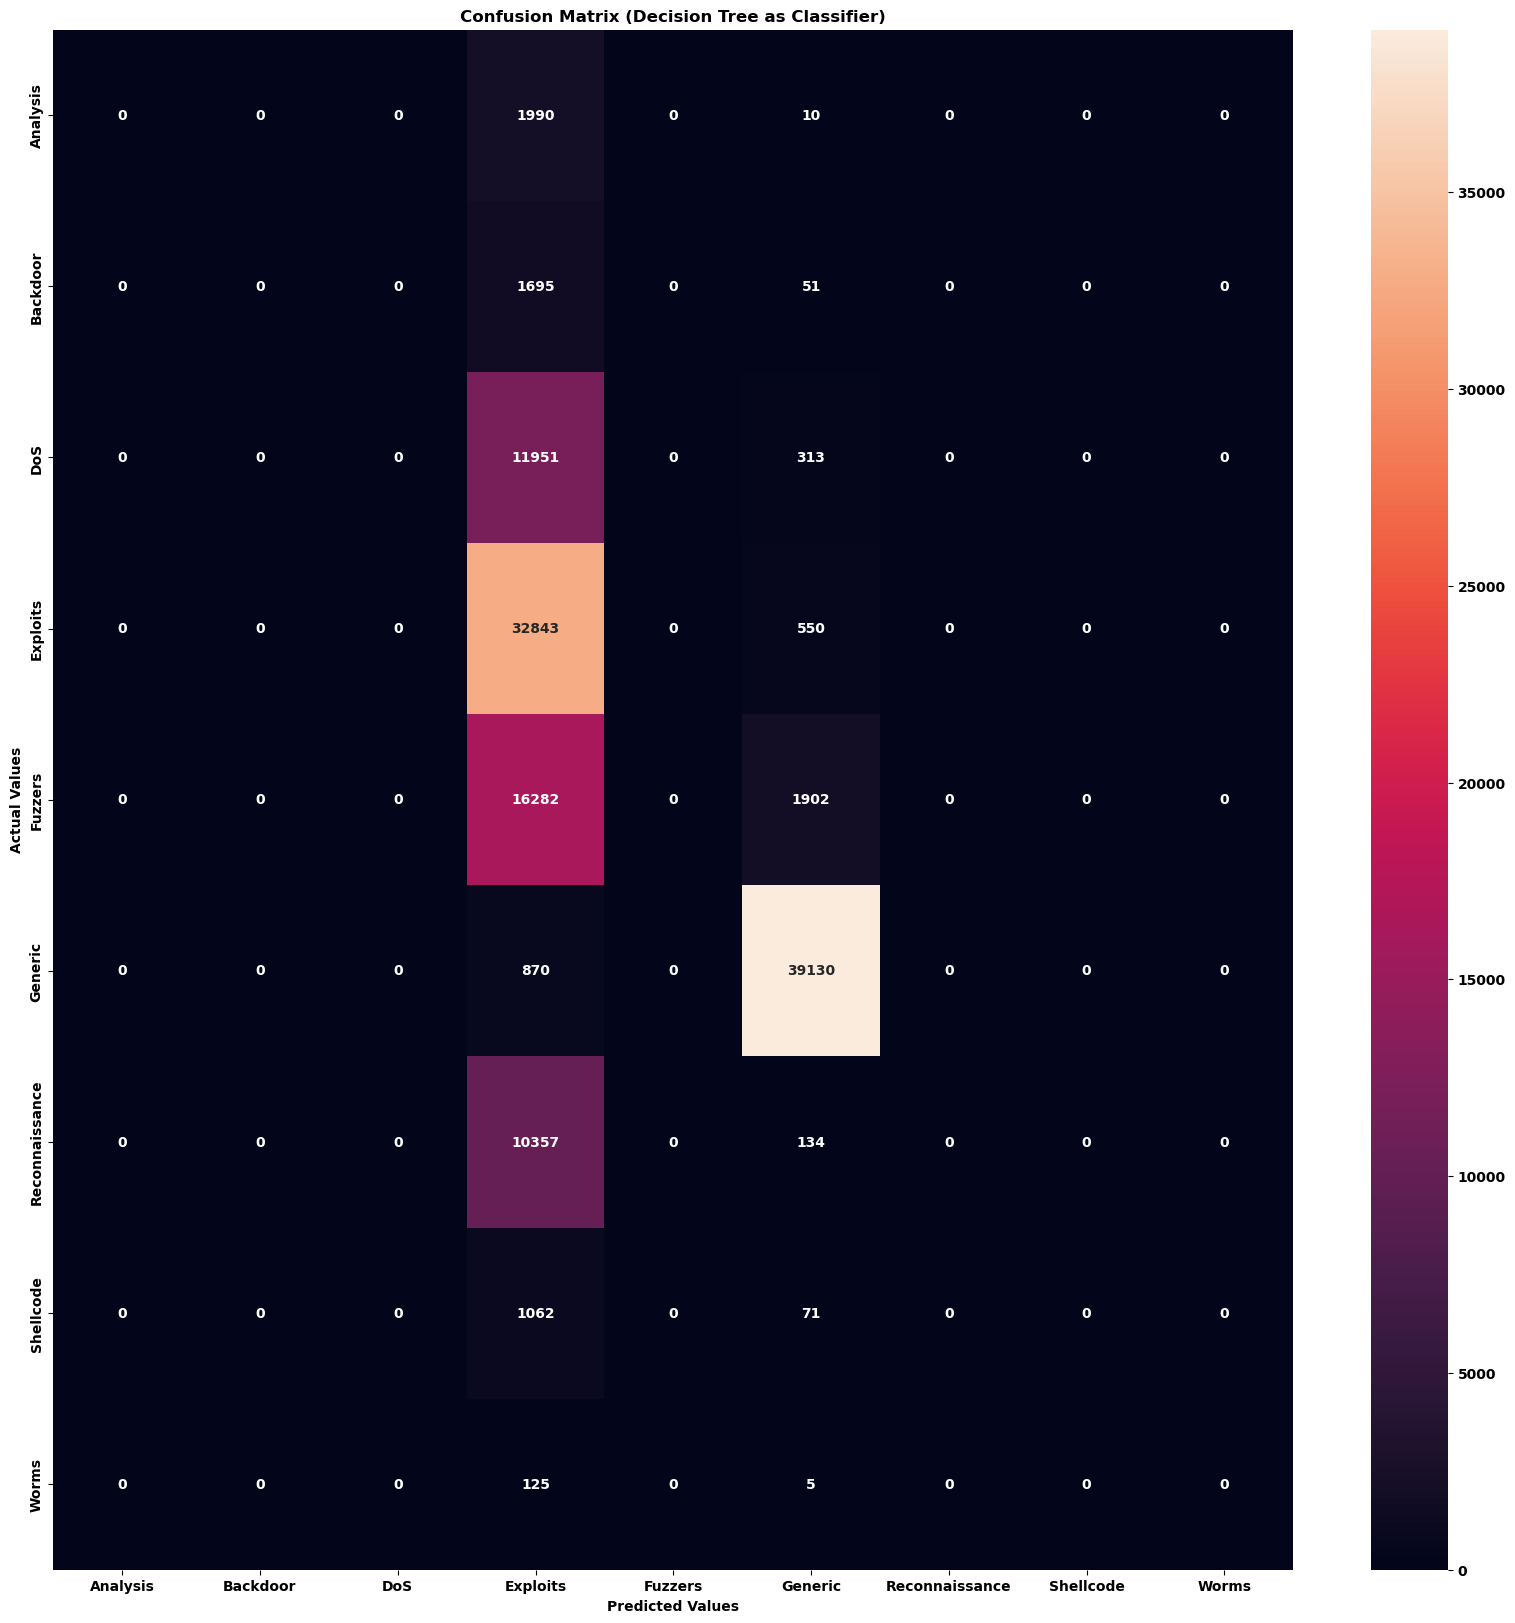

In [46]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Decision Tree as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [47]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.0
Backdoor: 0.0
DoS: 0.0
Exploits: 0.983529482226814
Fuzzers: 0.0
Generic: 0.97825
Reconnaissance: 0.0
Shellcode: 0.0
Worms: 0.0


### Random Forest

In [48]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_ranfor)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

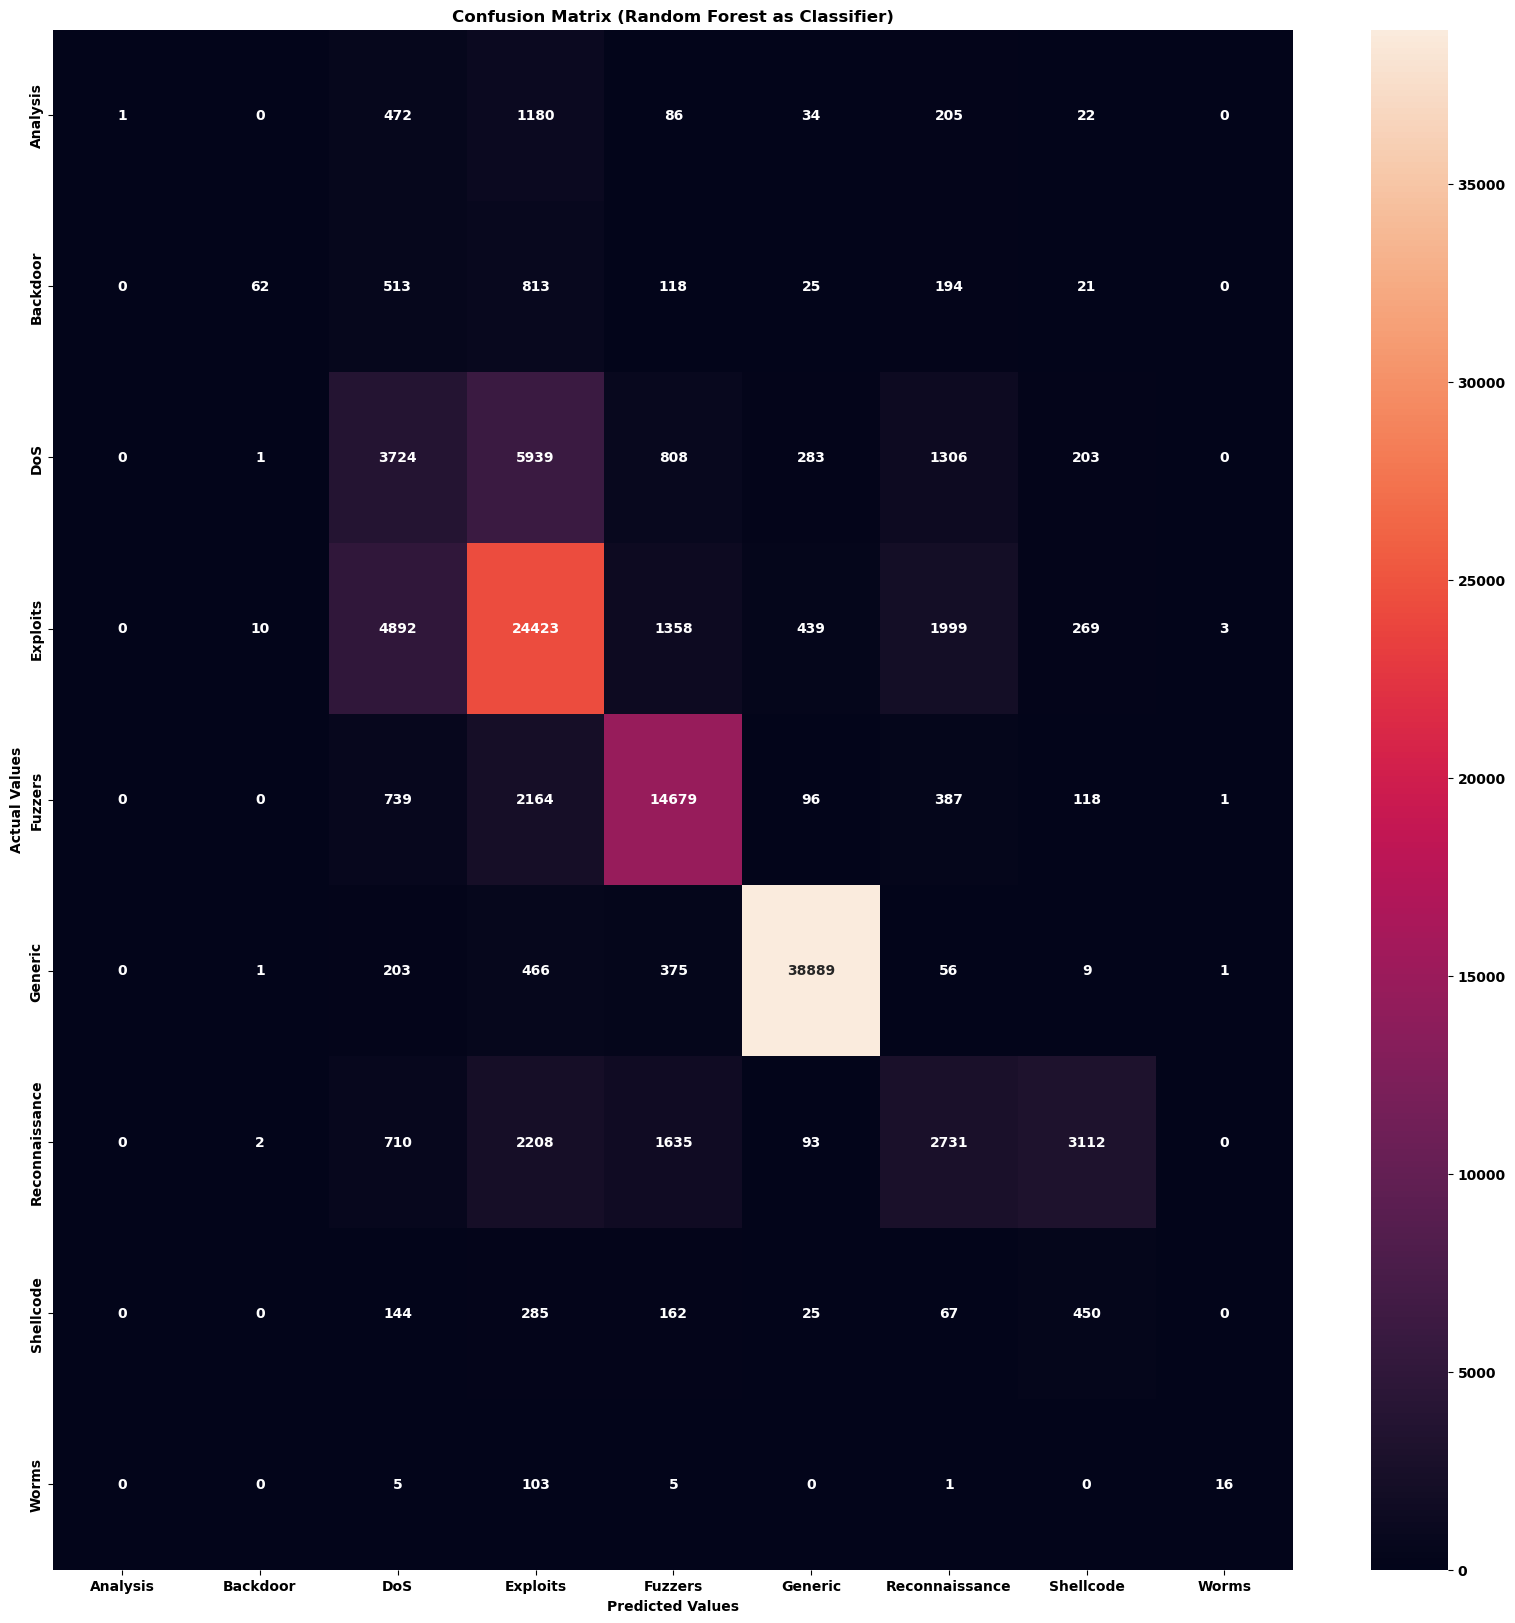

In [49]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Random Forest as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [50]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.0005
Backdoor: 0.035509736540664374
DoS: 0.3036529680365297
Exploits: 0.731380828317312
Fuzzers: 0.807248130224373
Generic: 0.972225
Reconnaissance: 0.2603183681250596
Shellcode: 0.3971756398940865
Worms: 0.12307692307692308


### Gradient Boosting

In [51]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_gbc)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

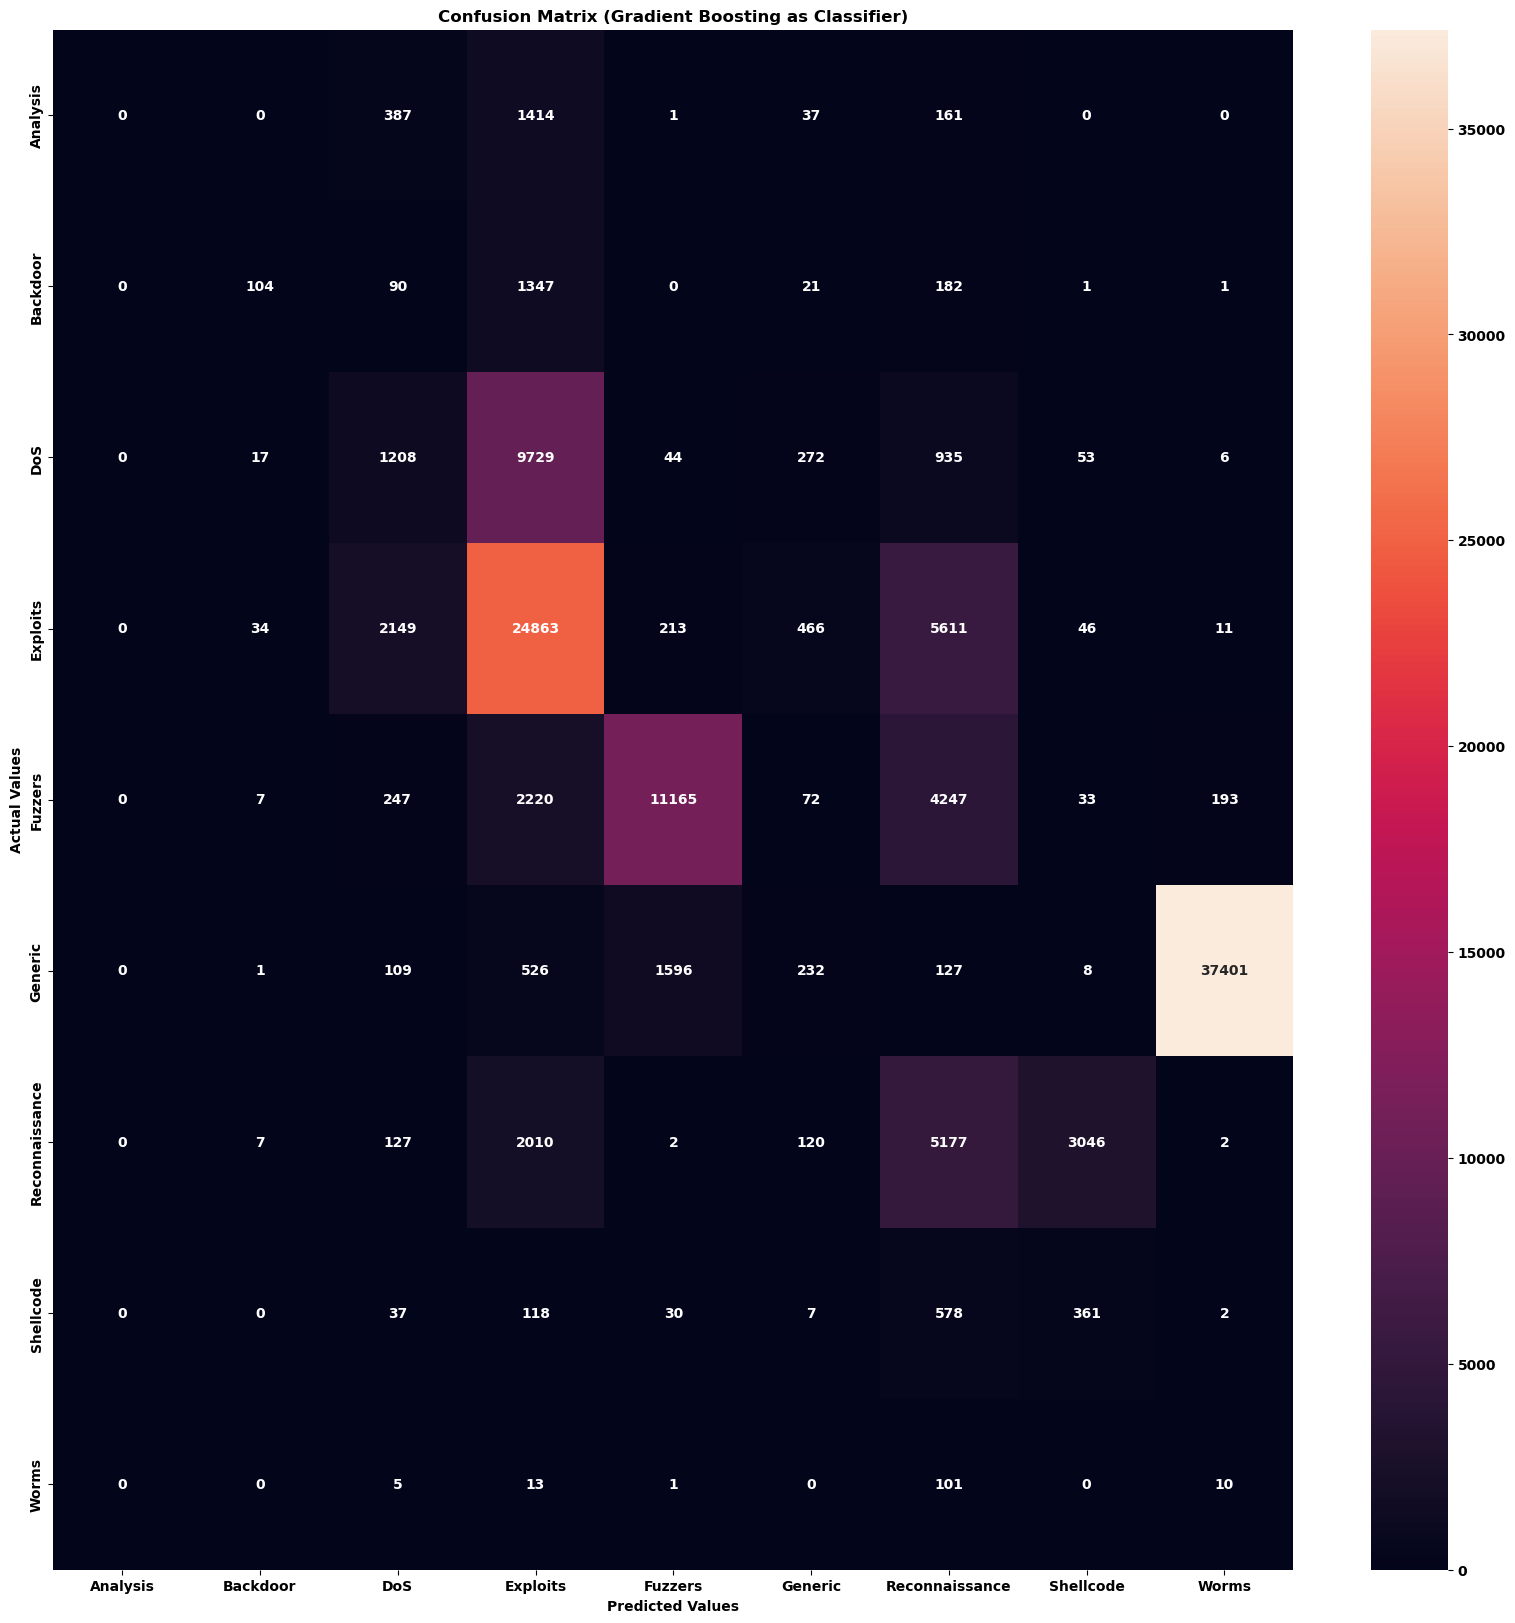

In [52]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Gradient Boosting as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [53]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.0
Backdoor: 0.05956471935853379
DoS: 0.09849967384213959
Exploits: 0.7445572425358609
Fuzzers: 0.614001319841619
Generic: 0.0058
Reconnaissance: 0.49347059384234104
Shellcode: 0.31862312444836716
Worms: 0.07692307692307693


### XGBoost

In [54]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_xgb)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

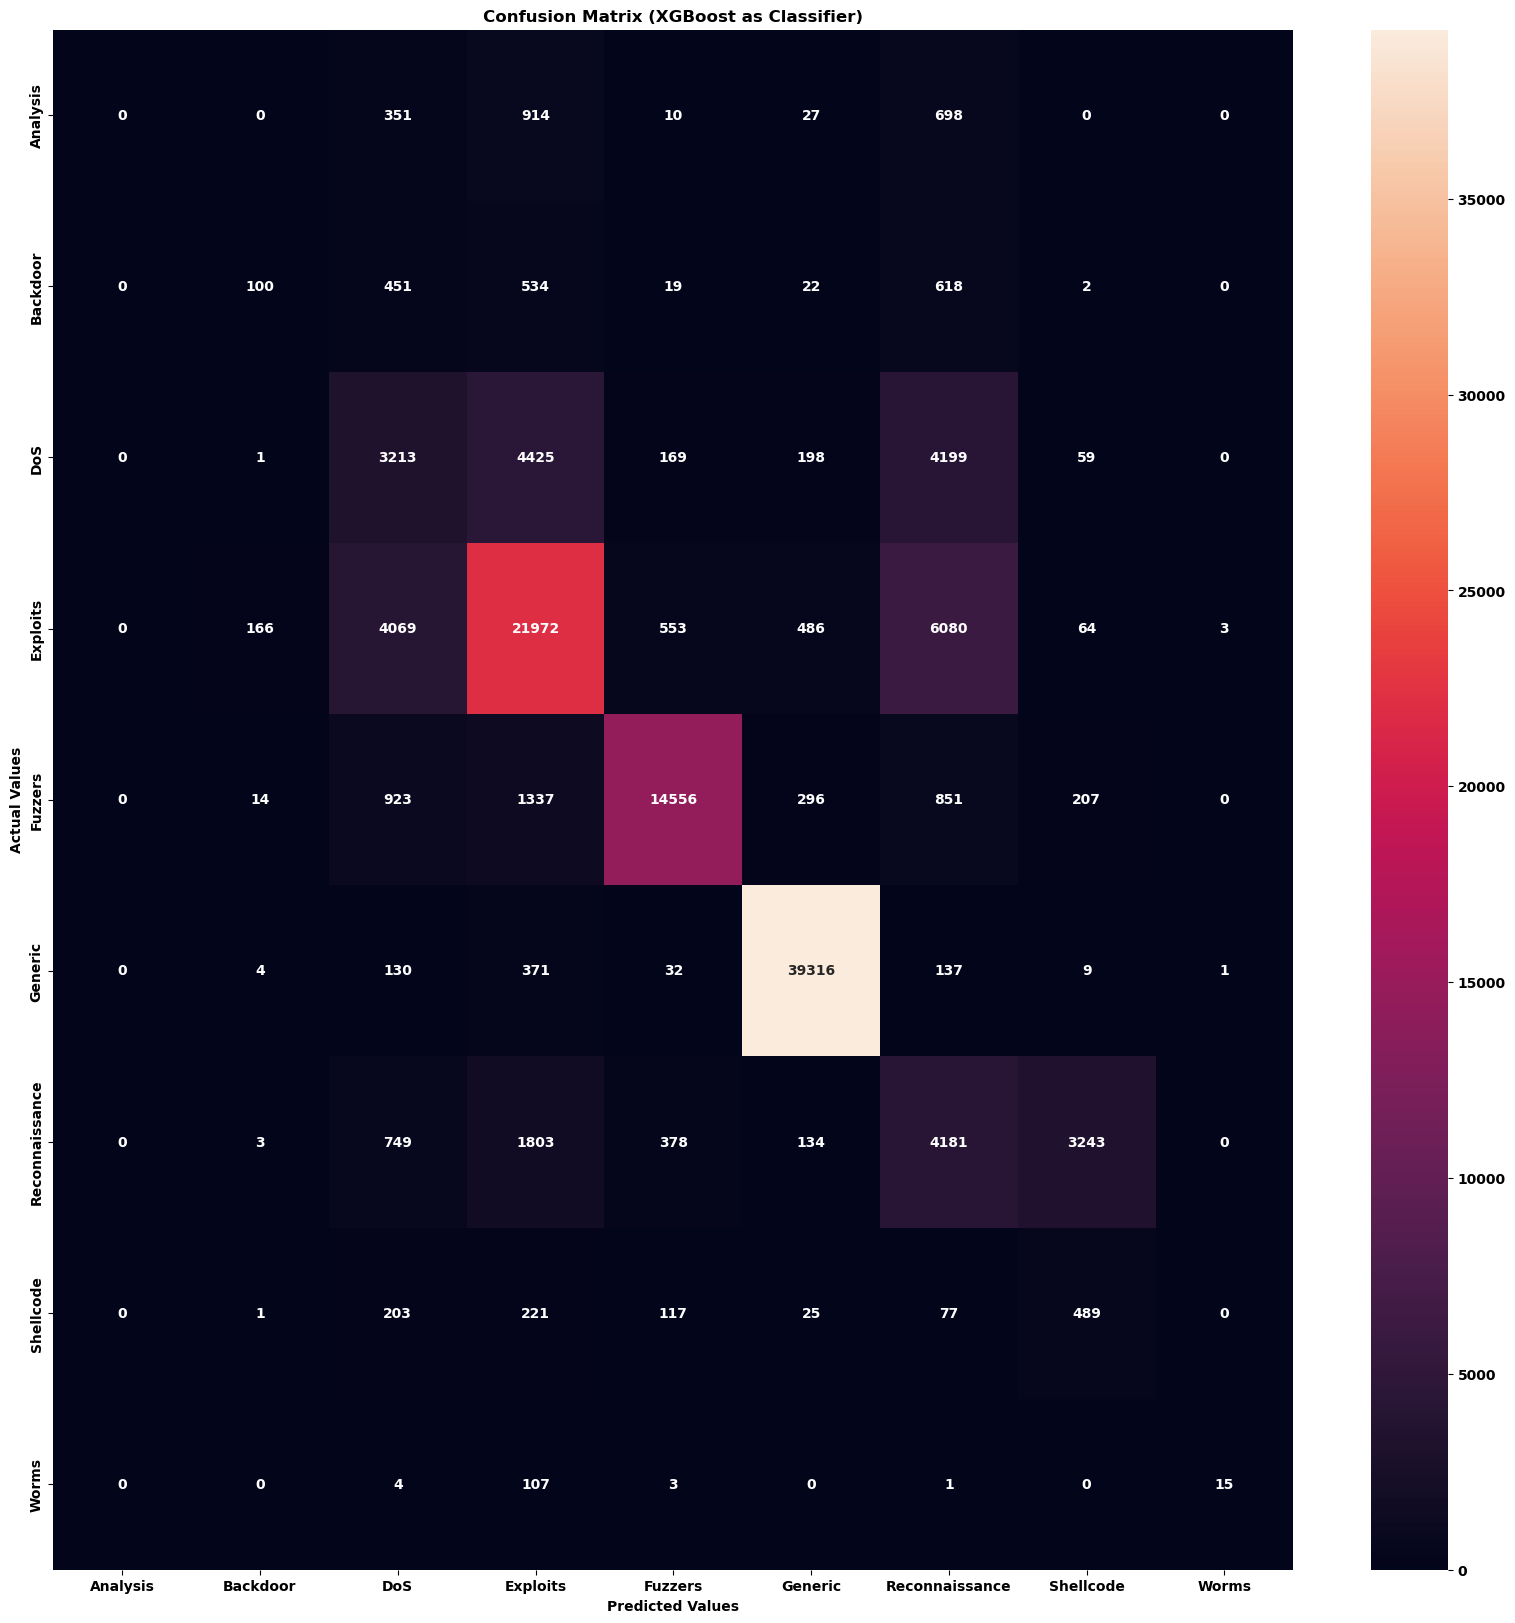

In [55]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (XGBoost as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [56]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.0
Backdoor: 0.0572737686139748
DoS: 0.261986301369863
Exploits: 0.657982211840805
Fuzzers: 0.8004839419269688
Generic: 0.9829
Reconnaissance: 0.3985320751120008
Shellcode: 0.4315975286849073
Worms: 0.11538461538461539


## Save all model

In [57]:
import pickle

In [58]:
# save the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/destree.pkl', 'wb') as model_file:
    pickle.dump(destree, model_file)

# save the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/ranfor.pkl', 'wb') as model_file:
    pickle.dump(ranfor, model_file)

# save the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/gbc.pkl', 'wb') as model_file:
    pickle.dump(gbc, model_file)

# save the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/xgb.pkl', 'wb') as model_file:
    pickle.dump(xgb, model_file)

In [59]:
# load the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/destree.pkl', 'rb') as model_file:
    destree = pickle.load(model_file)

# load the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/ranfor.pkl', 'rb') as model_file:
    ranfor = pickle.load(model_file)

# load the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/gbc.pkl', 'rb') as model_file:
    gbc = pickle.load(model_file)

# load the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/xgb.pkl', 'rb') as model_file:
    xgb = pickle.load(model_file)

## Save all predicted

In [60]:
# save the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/p_test_destree.pkl', 'wb') as model_file:
    pickle.dump(p_test_destree, model_file)

# save the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/p_test_ranfor.pkl', 'wb') as model_file:
    pickle.dump(p_test_ranfor, model_file)

# save the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/p_test_gbc.pkl', 'wb') as model_file:
    pickle.dump(p_test_gbc, model_file)

# save the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/p_test_xgb.pkl', 'wb') as model_file:
    pickle.dump(p_test_xgb, model_file)

In [61]:
# load the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/p_test_destree.pkl', 'rb') as model_file:
    p_test_destree = pickle.load(model_file)

# load the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/p_test_ranfor.pkl', 'rb') as model_file:
    p_test_ranfor = pickle.load(model_file)

# load the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/p_test_gbc.pkl', 'rb') as model_file:
    p_test_gbc = pickle.load(model_file)

# load the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Balanced/Normalize/Tomek Links/Saved/p_test_xgb.pkl', 'rb') as model_file:
    p_test_xgb = pickle.load(model_file)